## Day4: Pandas

In [128]:
import pandas as pd

# read csv file to dataframe
df = pd.read_csv("./energy_cost.csv")

# 1. How many different companies are represented in the data set?
print("1. There are {} different companies".format(df['Company Name'].unique().shape[0]))

# 2. What is the total number of jobs created for businesses in Queens?
filtered_df = df[df['Borough'] == 'Queens']
total_jobs = filtered_df['Job created'].sum()
print("2. There are {} jobs created in Queens".format(int(total_jobs)))

# 3. How many different unique email domains names are there in the data set?
df['domain'] = df['company email'].str.split('@').str[1]
print("3. There are {} unique email domain names".format(df['domain'].unique().shape[0]))

# 4. Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?
groups = df.groupby('NTA')

filtered_df = groups.filter(lambda x: len(x) >= 5)

new_groups = filtered_df.groupby('NTA')

print()
print('4. (1) average total savings:')
print(new_groups['Total Savings'].mean())
print()
print('4. (2) total jobs create for each NTAd:')
print(new_groups['Job created'].sum())

1. There are 439 different companies
2. There are 102 jobs created in Queens
3. There are 357 unique email domain names

4. (1) average total savings:
NTA
Battery Park City-Lower Manhattan                   469890.796667
Bushwick South                                       26140.455000
Carroll Gardens-Columbia Street-Red Hook             24337.390000
College Point                                        17159.372857
Crown Heights North                                   4036.298889
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill     59950.340000
East New York                                        48433.093333
East Williamsburg                                    13990.626364
Greenpoint                                            9753.649286
Hunters Point-Sunnyside-West Maspeth                 23931.398933
Hunts Point                                          39246.016154
Manhattanville                                        2760.888889
Maspeth                                              

## Day 5: Plotting

### 1. scatter plot

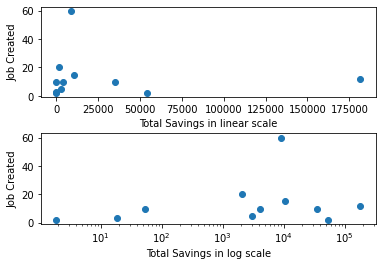

In [129]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2, 1)

axes[0].scatter( df['Total Savings'], df['Job created'])
axes[0].set_xlabel("Total Savings in linear scale")
axes[0].set_ylabel('Job Created')

axes[1].scatter( df['Total Savings'], df['Job created'])
axes[1].set_xscale('log')
axes[1].set_xlabel("Total Savings in log scale")
axes[1].set_ylabel('Job Created')

plt.subplots_adjust(hspace=0.4)
plt.show()

### 2. histogram

0          -inf
1      5.135381
2      5.481384
3      3.334387
4      5.964923
         ...   
445    4.548816
446    3.163537
447    3.952842
448    3.395298
449        -inf
Name: Total Savings, Length: 446, dtype: float64


c:\users\45463\appdata\local\programs\python\python38\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\45463\appdata\local\programs\python\python38\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


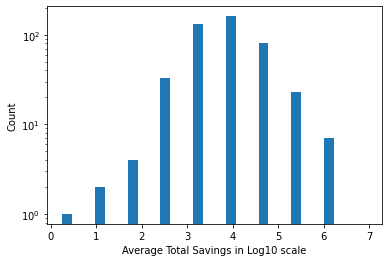

In [160]:
data = np.log10(df['Total Savings'])

data = data[~np.isnan(data)]
print(data)
data[np.isinf(data)] = -1000

# np.histogram(data)
fig, ax = plt.subplots()
ax.hist(data, log=True, rwidth=0.3, range=(0, data.max() + 1))
ax.set_xlabel("Average Total Savings in Log10 scale")
ax.set_ylabel("Count")
plt.show()

### 3. line plot

Effective Date
1993-02-28    15.0
1993-03-31     0.0
1993-04-30     0.0
1993-05-31     0.0
1993-06-30     0.0
              ... 
2020-03-31     0.0
2020-04-30     0.0
2020-05-31     0.0
2020-06-30     0.0
2020-07-31     0.0
Freq: M, Name: Job created, Length: 330, dtype: float64


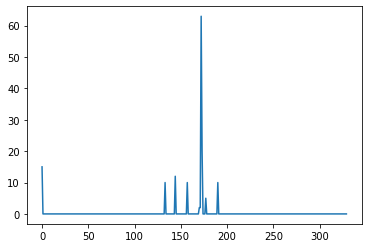

In [127]:
df = pd.read_csv("./energy_cost.csv")
df['Effective Date'] = pd.to_datetime(df['Effective Date'])

data = df.groupby(pd.Grouper(key='Effective Date', axis=0, freq='M'))['Job created'].sum()

print(data)

fig = plt.plot(np.arange(len(data)), data)